# Linear fit figure
- This script is used to visualize the correlation between roughness length and momemtum flux.
- Simulations: BASE, SENS1, SENS2, SENS3, SENS4

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [30]:
handletextpad = 0.5
labelfont = 6
size = 10
labelcolor = '#6b6b6b'
pad = 1
xwidth = 0.5
length = 2
llc = [[36/255, 105/255, 67/255], #246943
       [162/255, 156/255, 247/255], #a29cf7
       [235/255, 145/255, 86/255]] #eb9156
#label = ['AU-Preston', 'US-Minneapolis', 'US-WestPhoenix']
label = ["AU-Preston","US-Baltimore","US-WestPhoenix"]
linewidth = 0.5
output_dir = '/mnt/iusers01/fatpou01/sees01/a16404ys/scratch/output_analysis/project2/sp_roughness_sensitivity/linear_fit/'
df_var = pd.read_csv(output_dir + 'result.csv')
#msites = ["AU-Pre","US-Mi1","US-Wes"]
msites = ["AU-Pre","US-Bal","US-Wes"]

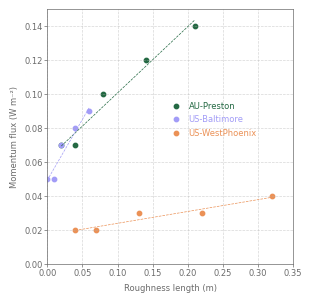

In [31]:
# Plot the data points and the fitted lines
fig, ax = plt.figure(figsize=(3, 3)), plt.gca()
for i in range(3):
    df_site = df_var[df_var['Site']==msites[i]]
    ax.scatter(df_site['z0'], df_site['TAUX'], color=llc[i], label=label[i], s = size) 
    model = LinearRegression().fit(df_site['z0'].values.reshape(-1, 1), df_site['TAUX'])
    z0_vals = np.linspace(min(df_site['z0']), max(df_site['z0']), 100).reshape(-1, 1)
    
    # Predict TAUX using the fitted model
    tau_x_vals = model.predict(z0_vals)
    
    # Plot the regression line
    ax.plot(z0_vals, tau_x_vals, color=llc[i], linestyle='dashed',linewidth = linewidth)

ax.set_xlabel('Roughness length (m)', fontsize=labelfont, color=labelcolor)
ax.set_ylabel('Momentum flux (W m\u207B\u00B2)', fontsize=labelfont, color=labelcolor)
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelcolor=labelcolor, color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
ax.tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
ax.spines['top'].set_color(labelcolor)
ax.spines['right'].set_color(labelcolor)
ax.spines['bottom'].set_color(labelcolor)
ax.spines['left'].set_color(labelcolor)
ax.spines['top'].set_linewidth(xwidth)
ax.spines['right'].set_linewidth(xwidth)
ax.spines['bottom'].set_linewidth(xwidth)
ax.spines['left'].set_linewidth(xwidth)
ax.grid(True,linestyle='--',linewidth=0.5, alpha=0.5)
ax.set_ylim(0, 0.15)
ax.set_xlim(0, 0.35)
lines, labels = ax.get_legend_handles_labels()
legend = fig.legend(lines, labels, bbox_to_anchor=(0.7, 0.5), loc='lower center', frameon=False, handletextpad=handletextpad, fontsize=labelfont, ncol=1)
for i, text in enumerate(legend.get_texts()):
        text.set_color(llc[i])
plt.subplots_adjust(left=0.15, right=0.97, bottom=0.1, top=0.95)
plt.show()
fig.savefig(output_dir + 'linear.png', dpi=300) 
fig.savefig(output_dir + 'linear.pdf', dpi=300)